In [66]:
#Import Libraries#

import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.shape

(232725, 18)

In [8]:
#Null & Duplicated Value Check
pd.isnull(df).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [7]:
df.duplicated().sum()

0

Text(0.5, 0.98, 'Popularity Distribution')

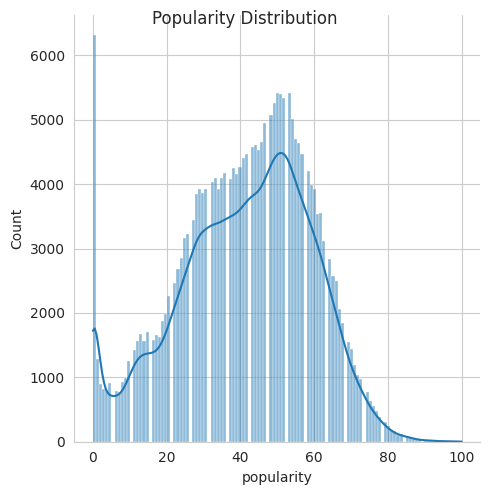

In [9]:
#Exploratory Graph for Popularity Distribution in the dataset
sns.displot(df['popularity'], kde=True).fig.suptitle('Popularity Distribution')

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


Text(0.5, 1.0, 'Popularity Based on Time Signature')

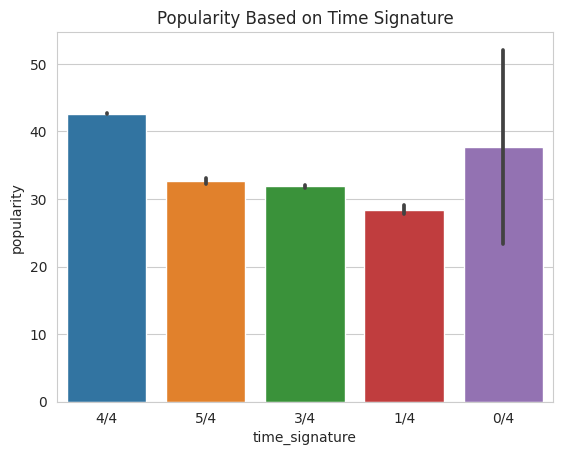

In [12]:
#Exploratory Graph for Time Signature/Popularity
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

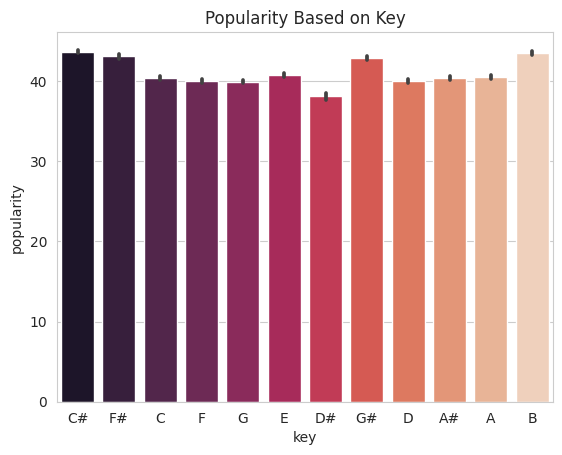

In [38]:
#Exploratory Graph for Popularity/Key
sns.barplot(x = 'key', y = 'popularity', data = df, palette='rocket')
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

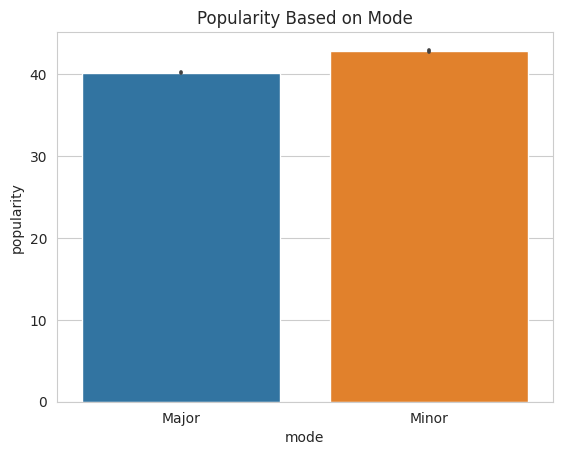

In [39]:
#Exploratory Graph for Popularity/Mode
sns.barplot(x = 'mode', y = 'popularity', data = df, palette='tab10')
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

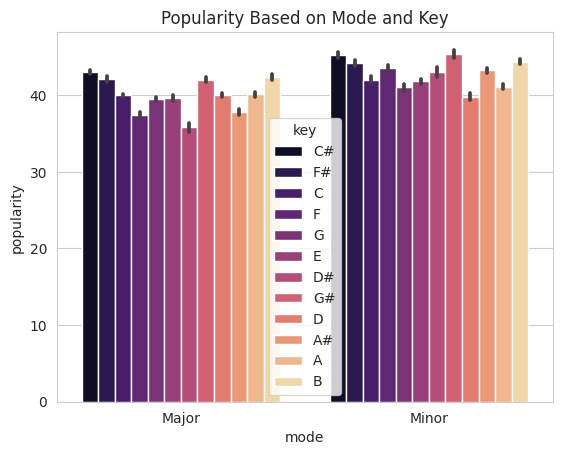

In [40]:
#Exploratory Graph for Popularity/Mode & Popularity/key
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df,palette='magma')
plt.title('Popularity Based on Mode and Key')

In [41]:
#punctuation correction of "Children's Music" Genre

df["genre"] = df["genre"].replace("Children’s Music", "Children's Music")
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
11568,Alternative,Skillet,Yours to Hold,42uZaQsVFvj5g6nMF3ZwNY,44,0.0149,0.383,221267,0.722,0.000,D,0.2370,-3.534,Major,0.0283,152.017,4/4,0.2270
164067,Reggaeton,Pusho,La Matemática del Jangueo,0YMr8ESWW1IWuyTE3SNGq7,21,0.5720,0.750,178917,0.826,0.000,F#,0.1170,-5.232,Major,0.0978,89.993,4/4,0.9220
216929,World,Kammerflimmer Kollektief,A Dark Grey Moonlight In The Lowlands (Remix O...,5RiXZx8KPFkfxAYQrMYMVD,33,0.5910,0.243,258667,0.159,0.455,D,0.0503,-17.862,Major,0.0289,94.774,4/4,0.0327
108153,Pop,Rex Orange County,Best Friend,47Bg6IrMed1GPbxRgwH2aC,79,0.3950,0.575,262231,0.714,0.000,F#,0.1150,-5.247,Major,0.0596,144.982,4/4,0.3200
194048,Movie,Frank Churchill,Overture - Snow White,6xB1tVi17ufjIEB7seMZ23,21,0.7030,0.177,131373,0.263,0.370,G,0.4580,-13.401,Minor,0.0341,90.376,4/4,0.1790


In [46]:
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
 df.loc[df['key'] == list_of_keys[i], 'key'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
202252,Soundtrack,Harry Gregson-Williams,Prince Caspian Flees - Score,00T4mz4MQjrjatqWKZIHax,29,0.20200,0.267,273093,0.712,0.953,4,0.1530,-10.383,Minor,0.0883,78.622,4/4,0.1390
184993,Ska,Street Dogs,Back to the World,107gdtQpMkeMOqxl88KDOl,40,0.01540,0.343,164347,0.979,0.000,7,0.1150,-3.979,Major,0.1530,178.319,4/4,0.5010
192198,Soul,Whethan,Savage (feat. Flux Pavilion & MAX),0kD586ste6xyDRqUYhVlCh,67,0.15100,0.679,205333,0.662,0.000,4,0.3760,-5.861,Major,0.0773,90.054,4/4,0.3650
145351,Indie,Broken Social Scene,Lover's Spit,3Cl35xMXJUEhpPaYBeNUQR,47,0.00232,0.326,382240,0.603,0.415,2,0.0573,-6.933,Major,0.0276,77.914,4/4,0.1700
199700,Soundtrack,Ludwig Goransson,Wheeler Fight,325xMckqZjAJLXs4GjVJEj,41,0.38100,0.129,152400,0.267,0.934,0,0.0778,-19.035,Minor,0.0433,79.775,1/4,0.0373


In [47]:
#Assing values for Major/Minor modes
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
215244,Country,Cassadee Pope,Distracted,5R8vaFVSMHLUS6QUhJlU7C,49,0.56600,0.673,168053,0.776,0.000000,6,0.264,-4.297,0,0.0617,97.999,4/4,0.610
122445,Reggae,Rebelution,Safe and Sound,5GQaLen4w5m5YiJmzYfegN,60,0.00545,0.827,229493,0.587,0.000000,7,0.055,-8.189,0,0.0604,77.688,4/4,0.539
75288,Children's Music,Children Songs Company,Victory Easter Carol,0yEh3rJ6jCV57yqm80XIyO,0,0.99600,0.488,245107,0.100,0.000000,11,0.119,-8.226,1,0.1790,73.903,3/4,0.419
46270,Blues,Otis Rush,Working Man,4Gia17DzXBhYFbYiJj6SyW,46,0.49200,0.633,147800,0.625,0.000418,2,0.204,-10.951,1,0.0436,103.355,4/4,0.841
137297,Reggae,Sublime,Caress Me Dub - Rarities Version,45gGfafVgSLiio8CHq605r,23,0.01680,0.698,210787,0.379,0.004660,10,0.111,-9.465,1,0.0697,79.749,4/4,0.561


In [48]:
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,...,mode,speechiness,tempo,time_signature,valence
172908,Comedy,Jim Breuer,SNL Press Story,10oP6wExs995iDb1pHsAV2,17,...,1,0.9280,127.007,2,0.3380
205881,Soundtrack,Murray Gold,Little Amy: The Apple (feat. The BBC National ...,4L4dp5H4VXrYchPa745eer,20,...,1,0.0425,134.819,1,0.0376
218541,World,Jonn Serrie,Stratos,5SFZK94rtOTDNtuZPS4WJ8,28,...,1,0.0435,84.236,2,0.0639
79505,Opera,Giuseppe Verdi,"Falstaff, Act I Scene I: ""Falstaff!""",6z0aIcDvrtJsoBulAwy5iT,13,...,1,0.0615,85.264,2,0.3130
127916,Classical,Nobuo Uematsu,Final Fantasy X - To Zanarkand,5uhjfRn1pUo0zSKPxxPUZ8,35,...,0,0.0333,83.597,2,0.1100


In [49]:
df.loc[df['popularity'] < 57, 'popularity'] = 0
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,0,0.3460,-1.828,1,0.0525,166.969,0,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0,0.246,0.590,137373,0.737,0.000,1,0.1510,-5.559,0,0.0868,174.003,0,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0,0.952,0.663,170267,0.131,0.000,2,0.1030,-13.879,0,0.0362,99.488,1,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,0,0.0985,-12.178,1,0.0395,171.758,0,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0,0.950,0.331,82625,0.225,0.123,3,0.2020,-21.150,1,0.0456,140.576,0,0.390


In [50]:
#Importing librarires for Model fiting and Prediction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [51]:
#Created features database for model implementation (features selection based on music theory)
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [53]:
#Defining the dataframe for both testing and training
training = df.sample(frac = 0.8,random_state = 42)
X_train = training[features]
y_train = training['popularity']
X_test = df.drop(training.index)[features]

In [54]:
#Add validation dataset using train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [55]:
#Logistic Regression Model
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict)
print("AUC: " + str(LR_AUC))

Accuracy: 0.7916532388011601
AUC: 0.5


In [56]:
#Random Forest Classifier Model
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict)
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9249113760876571
AUC: 0.8393164023852622


In [57]:
#K-Nearest Neighbors Classifier
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict)
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7725051025888925
AUC: 0.6127041693290006


In [58]:
#Decision Tree Classifier
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict)
print("AUC: " + str(DT_AUC))

Accuracy: 0.8570469438178108
AUC: 0.82015034007298


In [60]:
#Linear Support Vector Classification
training_LSVC = training.sample(10000)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity']
X_test_LSVC = df.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)

In [61]:
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

LSVC_AUC = roc_auc_score(y_valid_LSVC, LSVC_Predict)
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.7225
AUC: 0.5845140935539938


In [67]:
#Model Performance Summary
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC,
                                                         LSVC_AUC]})

In [64]:
#Model Acuuracy Sorting
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.924911
3,DecisionTreeClassifier,0.857047
0,LogisticRegression,0.791653
2,KNeighborsClassifier,0.772505
4,LinearSVC,0.722500


In [65]:
#ACU Sorting
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
1,RandomForestClassifier,0.839316
3,DecisionTreeClassifier,0.820150
2,KNeighborsClassifier,0.612704
4,LinearSVC,0.584514
0,LogisticRegression,0.500000


** With this project we were able to forecast popularity (more than 57 popularity) using audio-based measures such as key,duration,energy, mode, and danceability without the use of external variables like artist name, genre, and release date using a dataset of 232,725 Spotify Tracks.**